<div align="center">

# COVID19 Analysis  
    
</div>

<br>
<br>

Using the following data from www.ecdc.europa.eu/:

 * Data on country response measures to COVID-19
 * Historical data (to 20 June 2022) on the weekly number of new reported COVID-19 cases and deaths worldwide




<br>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.style.use('ggplot')  # optional: for ggplot-like style
#import matplotlib.dates as mdates

<br>

### Get the Data

In [2]:
# to read from a csv file in the local computer
#df_canada=pd.read_excel('Canada.xlsx')

In [3]:
path='https://www.ecdc.europa.eu/sites/default/files/documents/response_graphs_data_2022-08-25.csv'
df_measure = pd.read_csv(path)
df_measure.head()

,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-16,2020-04-13
1,Austria,AdaptationOfWorkplace,2021-04-01,2022-03-05
2,Austria,BanOnAllEvents,2020-11-03,2021-05-18
3,Austria,ClosDaycare,2020-03-16,2020-05-04
4,Austria,ClosHigh,2020-03-16,2020-09-30


In [4]:
path_covid19='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df_covid=pd.read_csv(path_covid19)
df_covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


<br>


### Get Familiar with the Data

In [5]:
# Information about the data set
# The info() method also tells us how many Non-Null values there are present in each column
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [6]:
df_covid.columns


Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [7]:
df_covid.rename(columns={'dateRep':'date', 'countriesAndTerritories':'country', ''
       'popData2019':'population', 'continentExp':'continent',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'cumulative_cases'}, inplace=True)

In [8]:
df_covid.head()

,date,day,month,year,cases,deaths,country,geoId,countryterritoryCode,population,continent,cumulative_cases
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [9]:
df_covid['year'].unique()

array([2020, 2019], dtype=int64)

In [10]:
df_covid.describe(include='all')

,date,day,month,year,cases,deaths,country,geoId,countryterritoryCode,population,continent,cumulative_cases
count,61900,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900,61625,61777,6.177700e+04,61900,59021.000000
unique,350,NaN,NaN,NaN,NaN,NaN,214,213,212,NaN,6,NaN
top,18/11/2020,NaN,NaN,NaN,NaN,NaN,South_Korea,SG,KOR,NaN,Europe,NaN
freq,213,NaN,NaN,NaN,NaN,NaN,350,350,350,NaN,17372,NaN
mean,NaN,15.628934,7.067157,2019.998918,1155.147237,26.055460,NaN,NaN,NaN,4.098770e+07,NaN,66.320586
std,NaN,8.841582,2.954776,0.032882,6779.224479,131.227055,NaN,NaN,NaN,1.531294e+08,NaN,162.329240
min,NaN,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,NaN,NaN,NaN,8.150000e+02,NaN,-147.419587
25%,NaN,8.000000,5.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,1.293120e+06,NaN,0.757526
50%,NaN,15.000000,7.000000,2020.000000,15.000000,0.000000,NaN,NaN,NaN,7.169456e+06,NaN,6.724045
75%,NaN,23.000000,10.000000,2020.000000,273.000000,4.000000,NaN,NaN,NaN,2.851583e+07,NaN,52.572719


<br>


### Cleaning Data



**Drop columns do not need**

In [11]:
# do not need columns geold,countryterritoryCode
df_covid = df_covid.drop(columns=['geoId', 'countryterritoryCode'])
df_covid.head()

,date,day,month,year,cases,deaths,country,population,continent,cumulative_cases
0,14/12/2020,14,12,2020,746,6,Afghanistan,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,38041757.0,Asia,6.968658


<br>

**Check columns with  null values**

In [12]:
#there are null in population and cumulative_cases columns
#Check the null values
df_null=df_covid.isnull()
df_null

,date,day,month,year,cases,deaths,country,population,continent,cumulative_cases
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
61895,False,False,False,False,False,False,False,False,False,True
61896,False,False,False,False,False,False,False,False,False,True
61897,False,False,False,False,False,False,False,False,False,True
61898,False,False,False,False,False,False,False,False,False,True


<br>

**Filter only the rows with null values**

In [13]:
null_rows = df_covid[df_covid.isnull().any(axis=1)]
null_rows

,date,day,month,year,cases,deaths,country,population,continent,cumulative_cases
327,12/01/2020,12,1,2020,0,0,Afghanistan,38041757.0,Asia,NaN
328,11/01/2020,11,1,2020,0,0,Afghanistan,38041757.0,Asia,NaN
329,10/01/2020,10,1,2020,0,0,Afghanistan,38041757.0,Asia,NaN
330,09/01/2020,9,1,2020,0,0,Afghanistan,38041757.0,Asia,NaN
331,08/01/2020,8,1,2020,0,0,Afghanistan,38041757.0,Asia,NaN
...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,14645473.0,Africa,NaN


<br>

**Null values in population column**

In [14]:
null_rows_pop=df_covid[df_covid['population'].isnull()]
null_rows_pop


,date,day,month,year,cases,deaths,country,population,continent,cumulative_cases
10935,10/03/2020,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
10936,02/03/2020,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
10937,01/03/2020,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
10938,29/02/2020,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
10939,28/02/2020,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...
60873,21/10/2020,21,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN
60874,20/10/2020,20,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN
60875,19/10/2020,19,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN
60876,18/10/2020,18,10,2020,0,0,Wallis_and_Futuna,NaN,Oceania,NaN


In [15]:
null_rows_pop['country'].unique()

array(['Cases_on_an_international_conveyance_Japan', 'Wallis_and_Futuna'],
      dtype=object)

In [16]:
null_rows_pop[(null_rows_pop['country']=='Cases_on_an_international_conveyance_Japan')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 10935 to 10998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              64 non-null     object 
 1   day               64 non-null     int64  
 2   month             64 non-null     int64  
 3   year              64 non-null     int64  
 4   cases             64 non-null     int64  
 5   deaths            64 non-null     int64  
 6   country           64 non-null     object 
 7   population        0 non-null      float64
 8   continent         64 non-null     object 
 9   cumulative_cases  0 non-null      float64
dtypes: float64(2), int64(5), object(3)
memory usage: 5.5+ KB


In [17]:
null_rows_pop[(null_rows_pop['country']=='Wallis_and_Futuna')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 60819 to 60877
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              59 non-null     object 
 1   day               59 non-null     int64  
 2   month             59 non-null     int64  
 3   year              59 non-null     int64  
 4   cases             59 non-null     int64  
 5   deaths            59 non-null     int64  
 6   country           59 non-null     object 
 7   population        0 non-null      float64
 8   continent         59 non-null     object 
 9   cumulative_cases  0 non-null      float64
dtypes: float64(2), int64(5), object(3)
memory usage: 5.1+ KB


In [18]:
#For all the 64 cases in 'Cases_on_an_international_conveyance_Japan' population is null, so is better drop it
# Same for Wallis_and_Futuna
df_covid_clean = df_covid[(df_covid['country'] != 'Cases_on_an_international_conveyance_Japan') & (df_covid['country'] != 'Wallis_and_Futuna')]
df_covid_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61777 entries, 0 to 61899
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              61777 non-null  object 
 1   day               61777 non-null  int64  
 2   month             61777 non-null  int64  
 3   year              61777 non-null  int64  
 4   cases             61777 non-null  int64  
 5   deaths            61777 non-null  int64  
 6   country           61777 non-null  object 
 7   population        61777 non-null  float64
 8   continent         61777 non-null  object 
 9   cumulative_cases  59021 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 5.2+ MB


<br>

**Negative cases**

In [19]:
#dataframe contain data with cases < 0, that's no posible
df_covid_clean['cases'].describe(include='all')

count     61777.000000
mean       1157.435858
std        6785.775773
min       -8261.000000
25%           0.000000
50%          16.000000
75%         276.000000
max      234633.000000
Name: cases, dtype: float64

In [20]:
# cases <0 will be set as 0

df_covid_clean.loc[df_covid_clean['cases'] < 0, 'cases'] = 0

df_covid_clean['cases'].describe(include='all')

count     61777.000000
mean       1157.700552
std        6785.635468
min           0.000000
25%           0.000000
50%          16.000000
75%         276.000000
max      234633.000000
Name: cases, dtype: float64

<br>

**Null values in comulative_cases column**

In [21]:
null_rows_cases=df_covid[df_covid['cumulative_cases'].isnull()]
null_rows_cases['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [22]:
country_nulls=null_rows_cases['country'].unique()
len(country_nulls)
#all the countries have nan values

214

In [23]:
# the comulative_cases are not affected for previous nan values, so the decision is to drop that rows
df_covid_clean.dropna(inplace=True)
df_covid_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59021 entries, 0 to 61886
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              59021 non-null  object 
 1   day               59021 non-null  int64  
 2   month             59021 non-null  int64  
 3   year              59021 non-null  int64  
 4   cases             59021 non-null  int64  
 5   deaths            59021 non-null  int64  
 6   country           59021 non-null  object 
 7   population        59021 non-null  float64
 8   continent         59021 non-null  object 
 9   cumulative_cases  59021 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 5.0+ MB


C:\Users\evama\AppData\Local\Temp\ipykernel_5436\2948249434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_clean.dropna(inplace=True)


In [24]:
#df_covid_clean.info()
df_covid_clean.dtypes

date                 object
day                   int64
month                 int64
year                  int64
cases                 int64
deaths                int64
country              object
population          float64
continent            object
cumulative_cases    float64
dtype: object

In [25]:
df_covid_clean['cases'].describe()

count     59021.000000
mean       1211.574473
std        6937.570456
min           0.000000
25%           0.000000
50%          20.000000
75%         309.000000
max      234633.000000
Name: cases, dtype: float64

<br>

**Set time format**

In [26]:
# Original format time is %d/%m/%Y
# If we convert to datetime64[ns] directly we can found some problems having the day first as: misunderstanding, change m by d, etc.
# So, first we will invert the order using a function
# The dateutil parser generally expects the date format to be in the order of year, month, and day.
# To handle this date format, you can use the dayfirst parameter of the dateutil.parser.parse function. 
# The strftime() method returns a string representing date and time using date, time or datetime object.


from dateutil import parser

def correct_date_format(date_obj):
    try:
        parsed_date = parser.parse(date_obj, dayfirst=True)
        return parsed_date.strftime('%Y-%m-%d')
    except ValueError:
        return None
    
df_covid_clean['date'] = df_covid_clean['date'].apply(correct_date_format)


C:\Users\evama\AppData\Local\Temp\ipykernel_5436\4235852241.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_clean['date'] = df_covid_clean['date'].apply(correct_date_format)


In [27]:
df_covid_clean['date'].head()

0    2020-12-14
1    2020-12-13
2    2020-12-12
3    2020-12-11
4    2020-12-10
Name: date, dtype: object

In [28]:
# convert date object to datetime type
df_covid_clean['date']=pd.to_datetime(df_covid_clean['date'])
df_covid_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59021 entries, 0 to 61886
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              59021 non-null  datetime64[ns]
 1   day               59021 non-null  int64         
 2   month             59021 non-null  int64         
 3   year              59021 non-null  int64         
 4   cases             59021 non-null  int64         
 5   deaths            59021 non-null  int64         
 6   country           59021 non-null  object        
 7   population        59021 non-null  float64       
 8   continent         59021 non-null  object        
 9   cumulative_cases  59021 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 5.0+ MB


C:\Users\evama\AppData\Local\Temp\ipykernel_5436\193756377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_clean['date']=pd.to_datetime(df_covid_clean['date'])


In [29]:
#Check there are no errors
print(df_covid_clean['date'].head())
print(df_covid['date'].head())

0   2020-12-14
1   2020-12-13
2   2020-12-12
3   2020-12-11
4   2020-12-10
Name: date, dtype: datetime64[ns]
0    14/12/2020
1    13/12/2020
2    12/12/2020
3    11/12/2020
4    10/12/2020
Name: date, dtype: object


<br>

### Preparing Data


**Creating a dataset for cases in function of date and country**

In [30]:
# First create a dtaframe with columns date, country and cases
df_ill=df_covid_clean[['date','country', 'cases']]

In [31]:
# set the country as an index, left as columns the date
#use pivot to use all the dates
df_n_ill = df_ill.pivot_table(index='country', columns='date', values='cases')
df_n_ill.head()

date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235.0,234.0,210.0,200.0,135.0,202.0,63.0,113.0,298.0,746.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,801.0,846.0,840.0,695.0,753.0,752.0,873.0,802.0,879.0,788.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,772.0,750.0,573.0,591.0,598.0,565.0,542.0,517.0,464.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,50.0,45.0,34.0,43.0,35.0,28.0,46.0,52.0,50.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,132.0,43.0,0.0,112.0,81.0,75.0,121.0,136.0,100.0,27.0


In [32]:
# There are some NAN where there were no data before in that date
# Thus, the decision is fill with 0 as, that day is not registeried any case of COVID

df_n_ill.fillna(0, inplace=True)

df_n_ill.head()

date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235.0,234.0,210.0,200.0,135.0,202.0,63.0,113.0,298.0,746.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,801.0,846.0,840.0,695.0,753.0,752.0,873.0,802.0,879.0,788.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,772.0,750.0,573.0,591.0,598.0,565.0,542.0,517.0,464.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,50.0,45.0,34.0,43.0,35.0,28.0,46.0,52.0,50.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.0,43.0,0.0,112.0,81.0,75.0,121.0,136.0,100.0,27.0


<br>

**Creating a dataset for deaths in function of date and country**

In [33]:
# First create a dtaframe with columns date, country and cases
df_death_p=df_covid_clean[['date','country', 'deaths']]

# set the country as an index, left as columns the date
#use pivot to use all the dates
df_death = df_death_p.pivot_table(index='country', columns='date', values='deaths')


# There are some NAN where there were no data before in that date
# As before, the decision is fill with 0 as, that day is not registeried any death

df_death.fillna(0, inplace=True)

df_death.describe(include='all')

date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14
count,212.0,212.0,212.000000,212.0,212.0,212.0,212.000000,212.0,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.004717,0.0,0.0,0.0,0.004717,0.0,0.014151,0.051887,...,58.768868,46.811321,35.377358,39.433962,59.632075,58.377358,58.146226,58.278302,48.367925,33.419811
std,0.0,0.0,0.068680,0.0,0.0,0.0,0.068680,0.0,0.206041,0.755483,...,221.981444,182.503736,108.539416,127.332532,220.405242,244.244457,224.960096,258.765210,191.627345,114.949559
min,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,19.500000,17.250000,18.250000,19.000000,21.000000,20.000000,23.250000,15.000000,16.250000,14.000000
max,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,3.000000,11.000000,...,2680.000000,2203.000000,1111.000000,1433.000000,2564.000000,3124.000000,2748.000000,3343.000000,2315.000000,1340.000000


<br>

**Creating a dataset for acumulative cases in function of date and country**

In [34]:
#First create a data frame with columns data, countries and cumulative cases
df_cltive=df_covid_clean[['date','country','cumulative_cases']]
df_cltive.head()

,date,country,cumulative_cases
0,2020-12-14,Afghanistan,9.013779
1,2020-12-13,Afghanistan,7.052776
2,2020-12-12,Afghanistan,6.868768
3,2020-12-11,Afghanistan,7.134266
4,2020-12-10,Afghanistan,6.968658


In [35]:
# set date as index
#df_cltive.set_column('date', inplace=True)
#df_cltive.head()

In [36]:
# create a dummy for country
#countries ={'Countries': df_cltive['country'].unique()}
#df_countries = pd.get_dummies(df_cltive['country'])

In [37]:
# set the country as an index, left as columns the date
df_cases = df_cltive.pivot_table(index='country', columns='date', values='cumulative_cases')
df_cases.head()

date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.115865,7.326160,7.215755,7.094835,6.963401,6.968658,7.134266,6.868768,7.052776,9.013779
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,343.869031,347.676989,357.284221,353.790682,354.105100,357.878122,365.459102,370.943958,382.612378,380.970414
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.459950,31.886240,31.101162,30.097749,28.838837,27.847037,26.639225,25.440704,24.216633,22.950753
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1067.251270,1047.560287,1042.309358,1023.931108,1018.680179,963.545427,861.152316,821.770351,811.268493,821.770351
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.270188,3.528639,3.277267,3.629188,3.440659,3.336968,3.468938,3.585198,3.374674,3.409237


In [38]:
# There are some NAN where there were no data before in that date
# Thus, the decision is for the first column have a 0, if NAN
# For the following columns, is the value of the previous column


#reemplace the first column with 0
df_cases.iloc[:, 0].fillna(0, inplace=True)

#forward fill by row
df_cases = df_cases.ffill(axis=1)

df_cases.head()
  

date,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,...,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-12,2020-12-13,2020-12-14
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.115865,7.326160,7.215755,7.094835,6.963401,6.968658,7.134266,6.868768,7.052776,9.013779
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,343.869031,347.676989,357.284221,353.790682,354.105100,357.878122,365.459102,370.943958,382.612378,380.970414
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.459950,31.886240,31.101162,30.097749,28.838837,27.847037,26.639225,25.440704,24.216633,22.950753
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1067.251270,1047.560287,1042.309358,1023.931108,1018.680179,963.545427,861.152316,821.770351,811.268493,821.770351
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.270188,3.528639,3.277267,3.629188,3.440659,3.336968,3.468938,3.585198,3.374674,3.409237


<br>

**Detect the top 5 and the bottom 5 of countries for cumulative cases**

In [39]:
# calculate max of cumulative cases
df_cases['max_cumulative'] = df_cases.max(axis=1)
df_cases.head()

date,2020-01-13 00:00:00,2020-01-14 00:00:00,2020-01-15 00:00:00,2020-01-16 00:00:00,2020-01-17 00:00:00,2020-01-18 00:00:00,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,...,2020-12-06 00:00:00,2020-12-07 00:00:00,2020-12-08 00:00:00,2020-12-09 00:00:00,2020-12-10 00:00:00,2020-12-11 00:00:00,2020-12-12 00:00:00,2020-12-13 00:00:00,2020-12-14 00:00:00,max_cumulative
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.326160,7.215755,7.094835,6.963401,6.968658,7.134266,6.868768,7.052776,9.013779,25.989862
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,347.676989,357.284221,353.790682,354.105100,357.878122,365.459102,370.943958,382.612378,380.970414,382.612378
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.886240,31.101162,30.097749,28.838837,27.847037,26.639225,25.440704,24.216633,22.950753,33.911648
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1047.560287,1042.309358,1023.931108,1018.680179,963.545427,861.152316,821.770351,811.268493,821.770351,1900.836210
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.528639,3.277267,3.629188,3.440659,3.336968,3.468938,3.585198,3.374674,3.409237,11.085520


In [40]:
# TOP and bottom 5 of countries
df_top5cases=df_cases.sort_values(by='max_cumulative', ascending=False).head(5)
df_bottom5cases=df_cases.sort_values(by='max_cumulative', ascending=False).tail(5)

top5cases=df_top5cases.index
bottom5cases=df_bottom5cases.index

df_cases.drop(columns=['max_cumulative'], inplace=True)

In [41]:
df_top5=df_cases[df_cases.index.isin(top5cases)]
df_bot5=df_cases[df_cases.index.isin(bottom5cases)]

## transpose for plotting
df_top5_t=df_top5.transpose()
df_bot5_t=df_bot5.transpose()

<br>

**Spain Data**

In [42]:
#Selecting Spain only
condition=df_covid_clean['country']=='Spain'
df_covid_spain=df_covid_clean[condition]
df_covid_spain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 52723 to 53058
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              336 non-null    datetime64[ns]
 1   day               336 non-null    int64         
 2   month             336 non-null    int64         
 3   year              336 non-null    int64         
 4   cases             336 non-null    int64         
 5   deaths            336 non-null    int64         
 6   country           336 non-null    object        
 7   population        336 non-null    float64       
 8   continent         336 non-null    object        
 9   cumulative_cases  336 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 28.9+ KB


In [43]:
df_covid_spain.set_index('date', inplace=True)
df_covid_spain.head()

,day,month,year,cases,deaths,country,population,continent,cumulative_cases
date,,,,,,,,,
2020-12-13,13,12,2020,0,0,Spain,46937060.0,Europe,218.094188
2020-12-12,12,12,2020,0,0,Spain,46937060.0,Europe,218.094188
2020-12-11,11,12,2020,10519,280,Spain,46937060.0,Europe,218.094188
2020-12-10,10,12,2020,7955,325,Spain,46937060.0,Europe,218.805779
2020-12-09,9,12,2020,9773,373,Spain,46937060.0,Europe,228.039421


<br>

**Create dataset by continent, for cumulative cases, deaths and ills**


In [44]:
df_continent= df_covid_clean.groupby('continent').sum()
df_continent

C:\Users\evama\AppData\Local\Temp\ipykernel_5436\2043295705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continent= df_covid_clean.groupby('continent').sum()


,day,month,year,cases,deaths,population,cumulative_cases
continent,,,,,,,
Africa,222101,109592,28817320,2378628,56294,3.636707e+11,1.872527e+05
America,204227,98769,26472100,30897147,785370,3.212738e+11,8.783230e+05
Asia,199800,87722,25643900,16780541,290097,1.464973e+12,5.914060e+05
Europe,261920,115267,33647140,21398723,479706,2.696870e+11,2.118615e+06
Oceania,35575,17390,4641960,53298,1151,1.277918e+10,1.387105e+05


<br>

**Germany Data**

In [45]:
#As before, selecting Germany only
condition_ger=df_covid_clean['country']=='Germany'
df_covid_ger=df_covid_clean[condition_ger]
df_covid_ger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 21880 to 22216
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              337 non-null    datetime64[ns]
 1   day               337 non-null    int64         
 2   month             337 non-null    int64         
 3   year              337 non-null    int64         
 4   cases             337 non-null    int64         
 5   deaths            337 non-null    int64         
 6   country           337 non-null    object        
 7   population        337 non-null    float64       
 8   continent         337 non-null    object        
 9   cumulative_cases  337 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 29.0+ KB


In [46]:
df_covid_ger.set_index('date', inplace=True)
df_covid_ger.head()

,day,month,year,cases,deaths,country,population,continent,cumulative_cases
date,,,,,,,,,
2020-12-14,14,12,2020,16362,188,Germany,83019213.0,Europe,341.136696
2020-12-13,13,12,2020,20200,321,Germany,83019213.0,Europe,334.881517
2020-12-12,12,12,2020,28438,496,Germany,83019213.0,Europe,328.149341
2020-12-11,11,12,2020,29875,598,Germany,83019213.0,Europe,320.027124
2020-12-10,10,12,2020,23679,440,Germany,83019213.0,Europe,311.512228


<br>

**All country data**

In [47]:
#select only the columns desired
df_all=df_covid_clean[['date', 'country', 'continent', 'deaths','cases', 'cumulative_cases']]

#set date as index
df_all.set_index('date', inplace=True)
df_all.head()

,country,continent,deaths,cases,cumulative_cases
date,,,,,
2020-12-14,Afghanistan,Asia,6,746,9.013779
2020-12-13,Afghanistan,Asia,9,298,7.052776
2020-12-12,Afghanistan,Asia,11,113,6.868768
2020-12-11,Afghanistan,Asia,10,63,7.134266
2020-12-10,Afghanistan,Asia,16,202,6.968658


In [48]:
#create a function

def Select_colum_group(column_group, group, study_column):
    
    condition=df_all[column_group]==group
    df_all_new=df_all[condition]

    
    return df_all_new[study_column]

In [49]:
#testing function

df_pgal_ccases=Select_colum_group('country', 'Portugal','cumulative_cases')
df_pgal_ccases.head()

date
2020-12-14    524.929556
2020-12-13    525.406367
2020-12-12    529.833894
2020-12-11    533.375915
2020-12-10    564.991378
Name: cumulative_cases, dtype: float64

<br>

### Plotting with Matplotlib

### Line Plots


Line plot testing for Spain

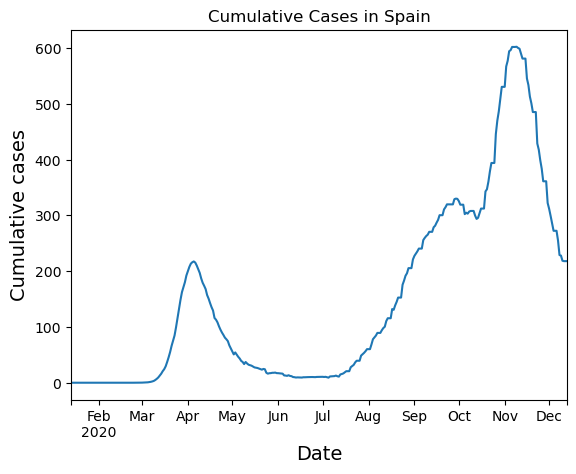

In [50]:
df_covid_spain['cumulative_cases'].plot()

plt.title('Cumulative Cases in Spain')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative cases', fontsize=14)

plt.minorticks_off()

plt.show()

Line plot testing for Spain, Artist Layer

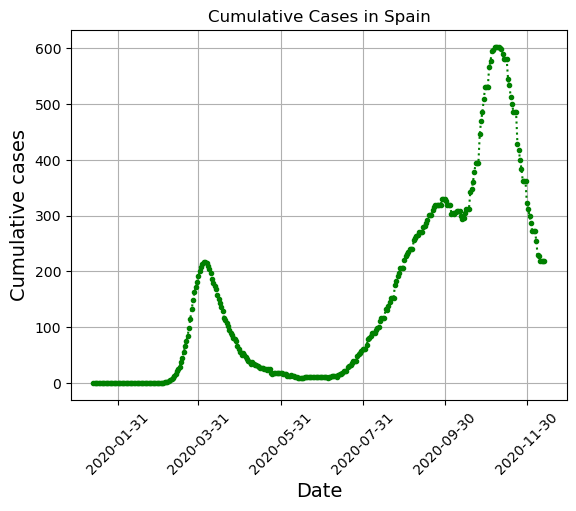

In [51]:
fig, ax =plt.subplots()

ax.plot(df_covid_spain['cumulative_cases'],
        marker='.',
        color='green',
        linestyle='dotted'
       )

ax.set_title('Cumulative Cases in Spain')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative cases', fontsize=14)
ax.grid(True)
ax.set_xticks( pd.date_range('2020-01-01', '2021-01-01', freq='2M'))
plt.xticks(rotation=45)

plt.show()

<br>

Line plot for top 5 cumulative cases

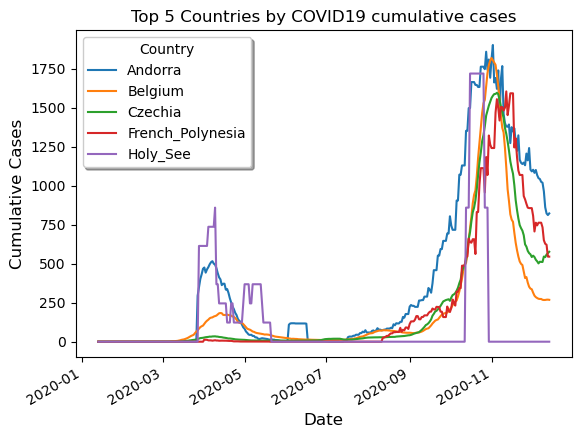

In [52]:
df_top5_t.plot(kind='line')

plt.title('Top 5 Countries by COVID19 cumulative cases', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.legend(title='Country', shadow=True, borderaxespad=0.5, fancybox=True)

plt.show()

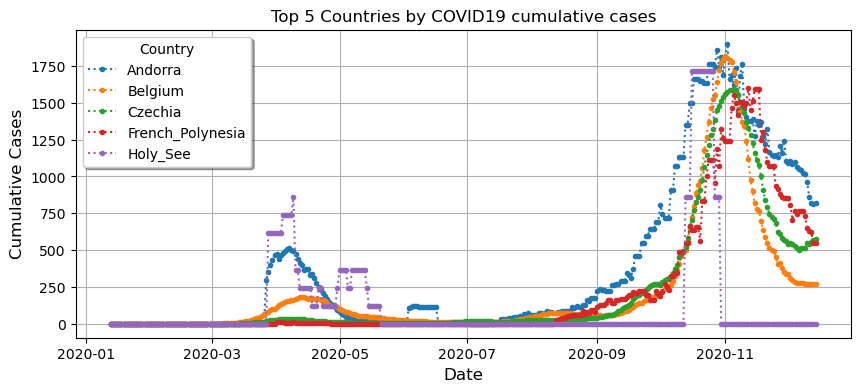

In [53]:
#Usando Artist layer
fig, ax= plt.subplots(figsize=(10, 4))

ax.plot(df_top5_t, marker=('.'), linestyle='dotted')

ax.set_title('Top 5 Countries by COVID19 cumulative cases', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Cases', fontsize=12)
ax.legend(title='Country', labels=df_top5_t.columns.tolist(), shadow=True, borderaxespad=0.5, fancybox=True)
ax.grid(True)

plt.show()

In [54]:
label=df_top5_t.columns.tolist()
label

['Andorra', 'Belgium', 'Czechia', 'French_Polynesia', 'Holy_See']

<br>

Line plot for bottom 5 cumulative cases

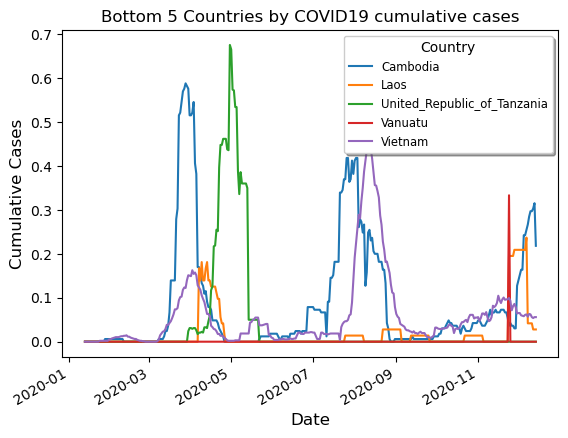

In [55]:
df_bot5_t.plot(kind='line')

plt.title('Bottom 5 Countries by COVID19 cumulative cases', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Cases', fontsize=12)
plt.legend(title='Country', fontsize='small', shadow=True, borderaxespad=0.5, fancybox=True )
plt.show()

<br>

#### Area plot



Area plot showing Top5 countries with more COVID19 cumulative cases

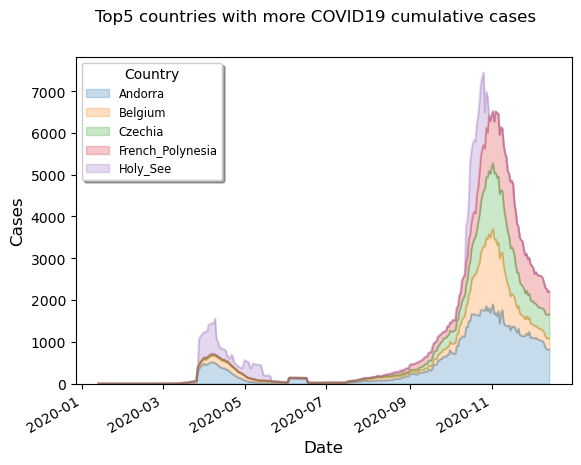

In [56]:
df_top5_t.plot(kind='area', 
               stacked=True,
               alpha=0.25)

plt.suptitle('Top5 countries with more COVID19 cumulative cases')  
plt.legend(title='Country', fontsize='small', fancybox=True, shadow=True)
plt.xlabel('Date', fontsize='12')
plt.ylabel('Cases', fontsize='12')
plt.show()

#### Histogram

COVID19 Cumulative cases in Spain histogram

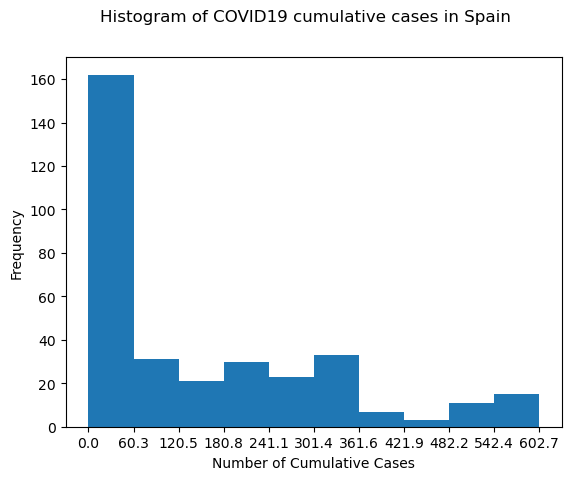

In [57]:
count, bin_edge= np.histogram(df_covid_spain['cumulative_cases'])

df_covid_spain['cumulative_cases'].plot(kind='hist',
                            xticks=bin_edge)


plt.suptitle('Histogram of COVID19 cumulative cases in Spain')
plt.ylabel('Frequency')
plt.xlabel('Number of Cumulative Cases')

plt.show()

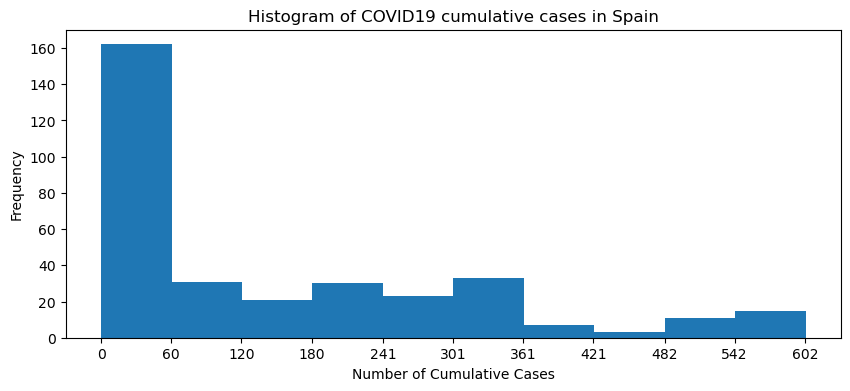

In [105]:
#Artist layer
fig, ax = plt.subplots(figsize=(10, 4))
count=ax.hist(df_covid_spain['cumulative_cases'])

ax.set_xticks(list(map(int,count[1])))
ax.set_title('Histogram of COVID19 cumulative cases in Spain')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Cumulative Cases')

plt.show()

<br>

COVID19 cases in Spain and Germany histogram

In [58]:
df_cases_sp_ger=pd.concat([df_covid_spain['cases'], df_covid_ger['cases']], axis=1)
df_cases_sp_ger.columns = ['Spain', 'Germany']
df_cases_sp_ger.fillna(0, inplace=True)
df_cases_sp_ger.isna().describe()

,Spain,Germany
count,337,337
unique,1,1
top,False,False
freq,337,337


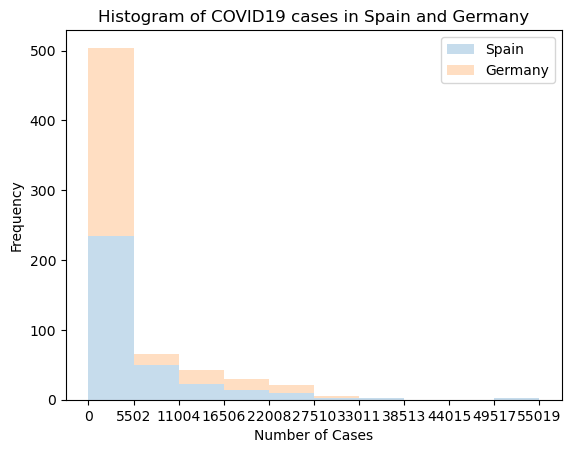

In [59]:
counts, bin_edge= np.histogram(df_cases_sp_ger,10)

df_cases_sp_ger.plot(kind ='hist', alpha=0.25, bins=10, xticks=bin_edge, stacked=True)


plt.title('Histogram of COVID19 cases in Spain and Germany', fontsize=12)
plt.ylabel('Frequency')
plt.xlabel('Number of Cases')

plt.show()

In [60]:
df_covid_spain['cases'].describe()

count      336.000000
mean      5153.750000
std       8490.908386
min          0.000000
25%          0.000000
50%        867.000000
75%       7995.000000
max      55019.000000
Name: cases, dtype: float64

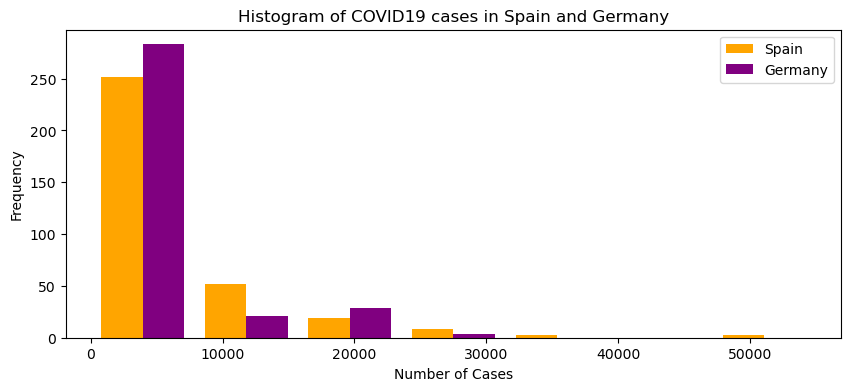

In [114]:
#Artist layer
fig, ax = plt.subplots(figsize=(10, 4))
count=ax.hist(df_cases_sp_ger, color=('orange','purple'), bins=7)

#ax.set_xticks(list(map(int,count[1])))
ax.set_title('Histogram of COVID19 cases in Spain and Germany', fontsize=12)
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Cases')
ax.legend(['Spain', 'Germany'])

plt.show()

<br>

**Bar Chart**

Vertical Plot using comparing cases of the 15 top countries in the last day registered

In [61]:
df_n_ill.rename(index={'United_States_of_America': 'USA'}, inplace=True)

df_cases_top15=df_cases.sort_values(df_n_ill.columns[-1], ascending=False).head(15)
df_cases_top15=df_cases_top15[df_cases.columns[-1]]
df_cases_top15

country
Serbia                      1396.055352
Georgia                     1388.098666
Croatia                     1208.808301
Lithuania                   1205.933468
Luxembourg                  1188.967476
Montenegro                  1051.943001
San_Marino                  1047.804255
Slovenia                    1005.955093
Belize                       909.950276
United_States_of_America     873.211592
Andorra                      821.770351
Jersey                       789.454154
Curaçao                      771.005305
Sweden                       738.754969
Hungary                      683.000783
Name: 2020-12-14 00:00:00, dtype: float64

Text(0, 0.5, 'Cases')

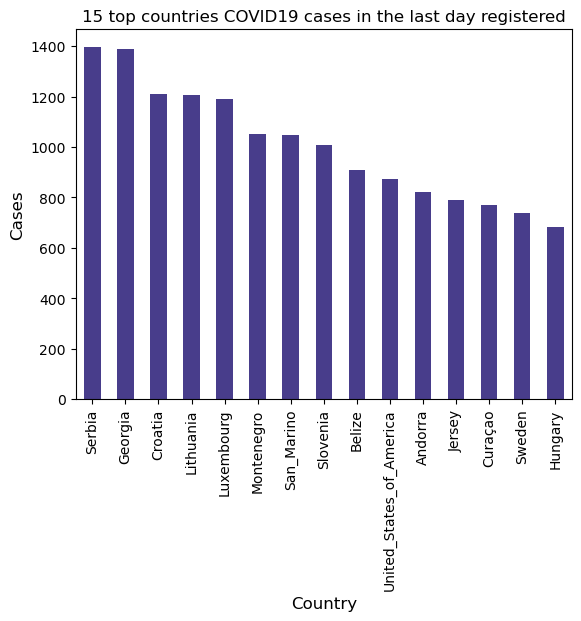

In [62]:
df_cases_top15.plot(kind='bar', color='darkslateblue')

plt.title('15 top countries COVID19 cases in the last day registered', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cases', fontsize=12)

In [88]:
#Artist layer
df_a=df_cltive.groupby('country').max()
df_a.sort_values('cumulative_cases', ascending=False, inplace=True)
df_15_maxcc=df_a.head(15)
df_15_maxcc


,date,cumulative_cases
country,,
Andorra,2020-12-14,1900.836210
Belgium,2020-12-14,1817.255072
Holy_See,2020-12-14,1717.791411
French_Polynesia,2020-12-14,1603.380060
Czechia,2020-12-14,1594.405529
Georgia,2020-12-14,1507.795561
Luxembourg,2020-12-14,1458.720887
Serbia,2020-12-14,1453.567352
Montenegro,2020-12-14,1376.285396


In [94]:
label_top15max=list(df_15_maxcc.index)

label_top15max[2]="Holy See"
label_top15max[3]="Polynesia"
label_top15max[-2]="San Marino"

label_top15max

['Andorra',
 'Belgium',
 'Holy See',
 'Polynesia',
 'Czechia',
 'Georgia',
 'Luxembourg',
 'Serbia',
 'Montenegro',
 'Switzerland',
 'Croatia',
 'Lithuania',
 'Liechtenstein',
 'San Marino',
 'Slovenia']

Text(0, 0.5, 'Cases')

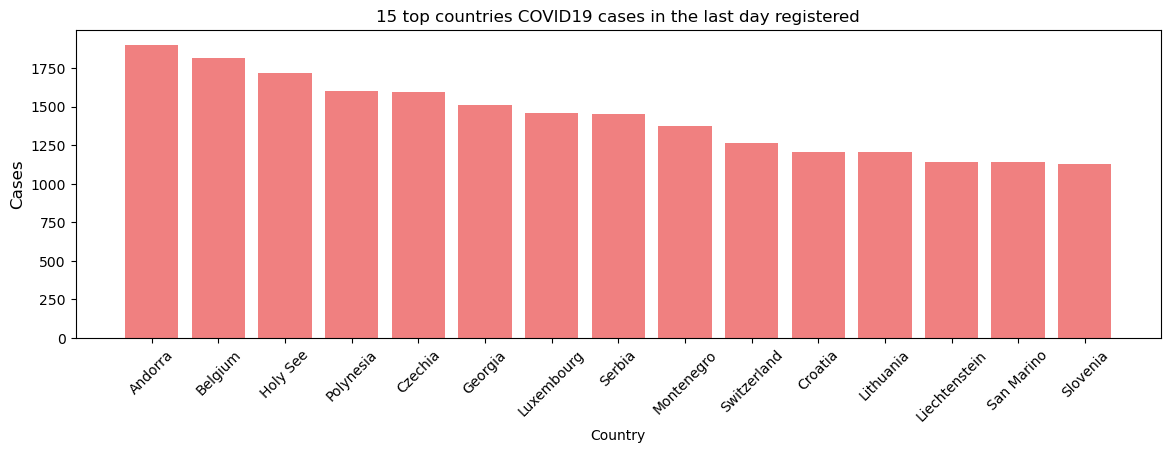

In [102]:
fig, ax =plt.subplots(figsize=(14,4))

ax.bar(label_top15max, df_15_maxcc['cumulative_cases'], color='lightcoral')

ax.set_title('15 top countries COVID19 cases in the last day registered', fontsize=12)
ax.set_xlabel('Country', fontsize=10)
plt.xticks(rotation=45)
ax.set_ylabel('Cases', fontsize=12)


<br>

Horizontal bar of 15 top countries in deaths

In [115]:
df_death.rename(index={'United_States_of_America': 'USA', 'United_Kingdom':'UK', 'South_Africa': 'S Africa' }, inplace=True)
df_death['Total_deaths'] = df_death.sum(axis=1)
df_top15_death=df_death.sort_values('Total_deaths', ascending=False).head(15)
df_top15_death=df_top15_death['Total_deaths']

Text(0, 0.5, 'Deaths')

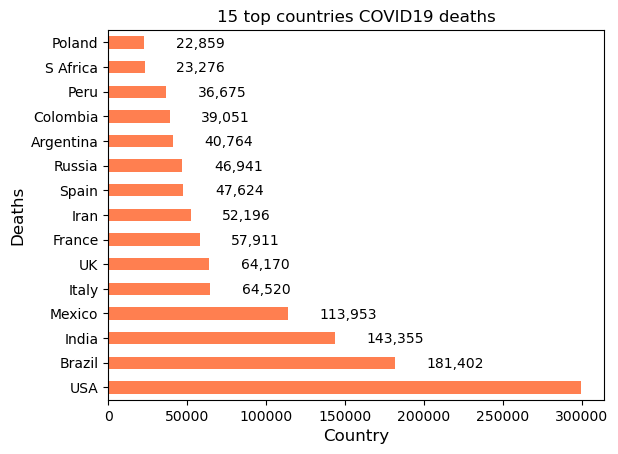

In [116]:
df_top15_death.plot(kind='barh', color='coral')

for index, value in enumerate(df_top15_death): 
        label = format(int(value), ',') 
        plt.annotate(label, xy=(value + 20000 , index - 0.2 ), color='black')

plt.title('15 top countries COVID19 deaths', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Deaths', fontsize=12)

<br>

**Pie Chart**

Cumulative cases and  Deaths by Continent

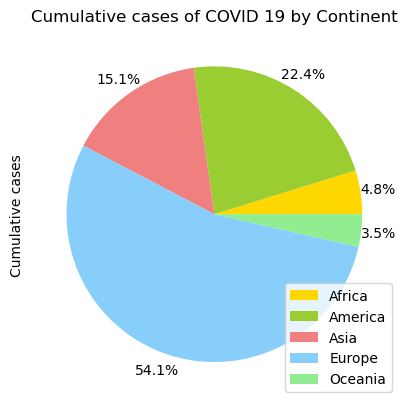

In [117]:
#Cumulative cases
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_continent['cumulative_cases'].plot(kind='pie', autopct='%1.1f%%', pctdistance=1.12, labels=None, colors=colors_list)

plt.title('Cumulative cases of COVID 19 by Continent')
plt.ylabel('Cumulative cases')
plt.legend(labels=df_continent.index, loc='lower right', fontsize=10)

plt.show()

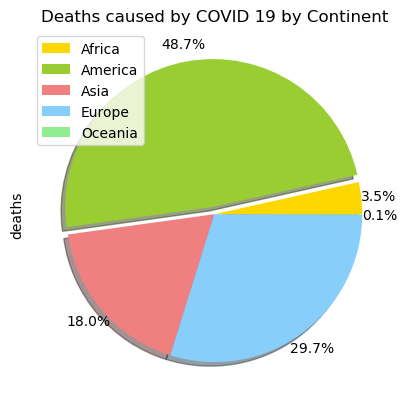

In [118]:
#Deaths
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0.05, 0, 0.0, 0.0]

df_continent['deaths'].plot(kind='pie', autopct='%1.1f%%', pctdistance=1.12, labels=None, shadow=True, colors=colors_list, 
                            explode=explode_list )

plt.title('Deaths caused by COVID 19 by Continent')
plt.legend(labels=df_continent.index, loc='best', fontsize=10)

plt.show()

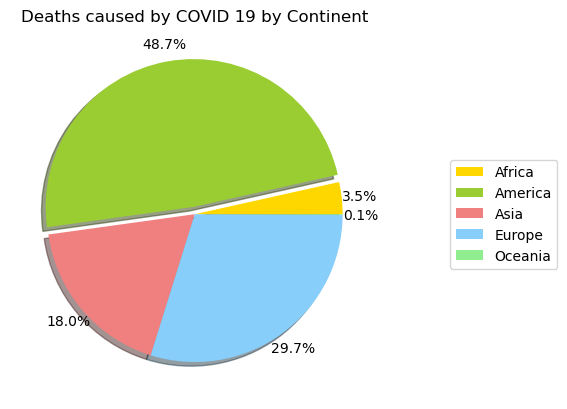

In [132]:
#Artis layer

fig, ax = plt.subplots()

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'mediumpurple', 'pink']
explode_list = [0, 0.05, 0, 0.0, 0.0]

ax.pie(df_continent['deaths'], 
       autopct='%1.1f%%', 
       pctdistance=1.12, 
       labels=None, 
       shadow=True, 
       colors=colors_list, 
       explode=explode_list )

ax.set_title('Deaths caused by COVID 19 by Continent')
ax.legend(labels=df_continent.index, loc='right', fontsize=10, bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

Making a subplot

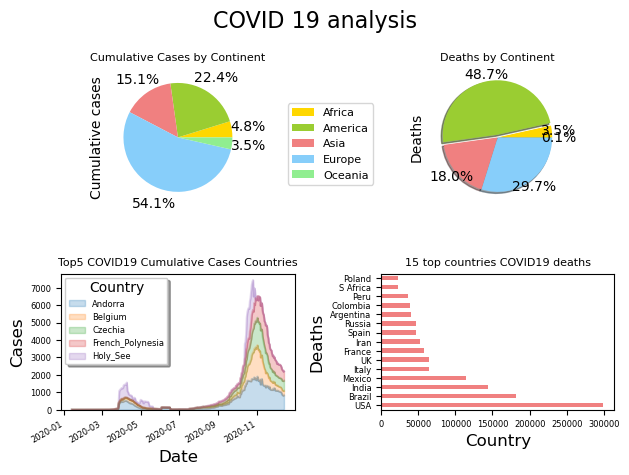

In [119]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle('COVID 19 analysis', fontsize=16)

ax1 = axes[0, 0]
ax2 = axes[0, 1]
ax3 = axes[1, 0]
ax4 = axes[1, 1]


colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']


# Subplot 1: Box plot_cumulative cases by continent
df_continent['cumulative_cases'].plot(kind='pie', autopct='%1.1f%%', pctdistance=1.3, labels=None, colors=colors_list, ax=ax1)
ax1.set_ylabel('Cumulative cases')
ax1.legend(labels=df_continent.index, loc='right', fontsize=8, bbox_to_anchor=(0.6, 0.7), bbox_transform=plt.gcf().transFigure)
ax1.set_title('Cumulative Cases by Continent', fontsize=8) 


# Subplot 2: Box plot deaths  by continent
explode_list = [0, 0.05, 0, 0.0, 0.0]

df_continent['deaths'].plot(kind='pie', autopct='%1.1f%%', pctdistance=1.12, labels=None, shadow=True, colors=colors_list, 
                            explode=explode_list, ax=ax2 )
ax2.set_ylabel('Deaths')
ax2.set_title('Deaths by Continent', fontsize=8) 



# Subplot 3: Area plot
df_top5_t.plot(kind='area', stacked=True, alpha=0.25, ax=ax3)

ax3.set_title('Top5 COVID19 Cumulative Cases Countries', fontsize=8)  
ax3.legend(title='Country', fontsize=6, fancybox=True, shadow=True)
ax3.set_xlabel('Date', fontsize='12')
ax3.set_ylabel('Cases', fontsize='12')
ax3.tick_params(axis=('both'), labelsize=6)



# Subplot 4: Bar chart top 15 countries deaths
df_top15_death.plot(kind='barh', color='lightcoral', ax=ax4)

ax4.set_title('15 top countries COVID19 deaths', fontsize=8)
ax4.set_xlabel('Country', fontsize=12)
ax4.set_ylabel('Deaths', fontsize=12)
ax4.tick_params(axis='both', labelsize=6)



plt.tight_layout()
plt.subplots_adjust(hspace=0.5) 
plt.show()

<br>

**Box Plots**

Comparing cumulative cases of Germany and Spain

In [120]:
df_GPS= pd.concat([df_covid_ger['cumulative_cases'], df_covid_spain['cumulative_cases']], axis=1)
df_GPS.columns=['Germany', 'Spain']
df_GPS.reset_index(inplace=True)
df_GPS.head()


,date,Germany,Spain
0,2020-01-13,0.0,0.0
1,2020-01-14,0.0,0.0
2,2020-01-15,0.0,0.0
3,2020-01-16,0.0,0.0
4,2020-01-17,0.0,0.0


In [121]:
df_GPS.describe()

,Germany,Spain
count,337.000000,336.000000
mean,60.000401,150.459764
std,96.925364,169.458236
min,0.000000,0.000000
25%,6.574382,10.598235
50%,17.938016,76.848656
75%,54.830681,271.127442
max,341.136696,602.717767


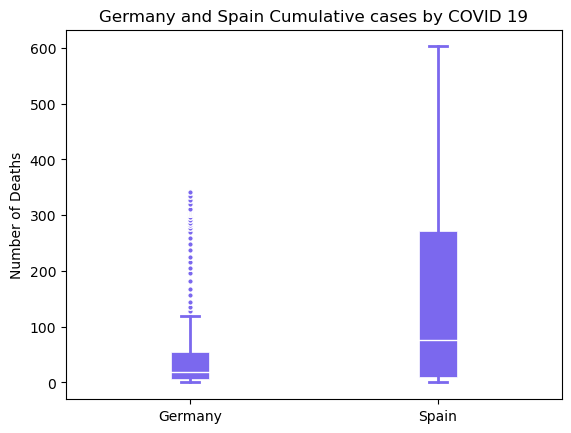

In [122]:
df_GPS.plot(kind='box', patch_artist=True, medianprops={"color": "white", "linewidth": 1},
            boxprops={"facecolor": "mediumslateblue", "edgecolor": "white", "linewidth": 0.5},
            whiskerprops={"color": "mediumslateblue", "linewidth": 2},
            capprops={"color": "mediumslateblue", "linewidth":2},
            flierprops = dict(marker='.', markerfacecolor='mediumslateblue', markersize=8, linestyle='none', markeredgecolor='white'))

plt.title('Germany and Spain Cumulative cases by COVID 19')
plt.ylabel('Number of Deaths')

plt.show()

<br>

**Scatter Plots**

In [123]:
df_covid_spain.reset_index(inplace=True)
df_covid_spain.head()

,date,day,month,year,cases,deaths,country,population,continent,cumulative_cases
0,2020-12-13,13,12,2020,0,0,Spain,46937060.0,Europe,218.094188
1,2020-12-12,12,12,2020,0,0,Spain,46937060.0,Europe,218.094188
2,2020-12-11,11,12,2020,10519,280,Spain,46937060.0,Europe,218.094188
3,2020-12-10,10,12,2020,7955,325,Spain,46937060.0,Europe,218.805779
4,2020-12-09,9,12,2020,9773,373,Spain,46937060.0,Europe,228.039421


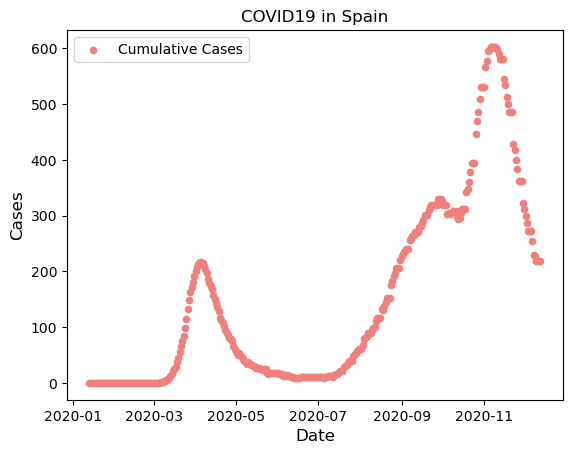

In [124]:
df_covid_spain.plot(kind='scatter', x='date', y='cumulative_cases' ,label='Cumulative Cases', color='lightcoral')


plt.title('COVID19 in Spain')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cases', fontsize=12)


plt.show()

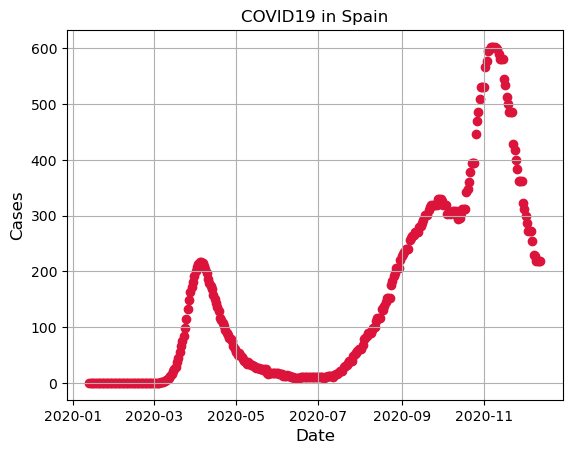

In [125]:
#Artist layer

fig, ax = plt.subplots()

ax.scatter(df_covid_spain['date'], df_covid_spain['cumulative_cases'] ,label='Cumulative Cases', color='crimson')

ax.set_title('COVID19 in Spain')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cases', fontsize=12)
ax.grid(True)


plt.show()

<br>

**Bubble Plots**

In [126]:
df_sp_ccases=Select_colum_group('country','Spain','cumulative_cases').to_frame()
df_gr_ccases=Select_colum_group('country','Germany','cumulative_cases').to_frame()

df_sp_ccases.reset_index(inplace=True)
df_gr_ccases.reset_index(inplace=True)

In [127]:
#First normalize data for spain and germany
# normalize Spain data
norm_spain = (df_sp_ccases['cumulative_cases'] - df_sp_ccases['cumulative_cases'].min()) / (df_sp_ccases['cumulative_cases'].max() - df_sp_ccases['cumulative_cases'].min())

# normalize Germany data
norm_germany = (df_gr_ccases['cumulative_cases'] - df_gr_ccases['cumulative_cases'].min()) / (df_gr_ccases['cumulative_cases'].max() - df_gr_ccases['cumulative_cases'].min())



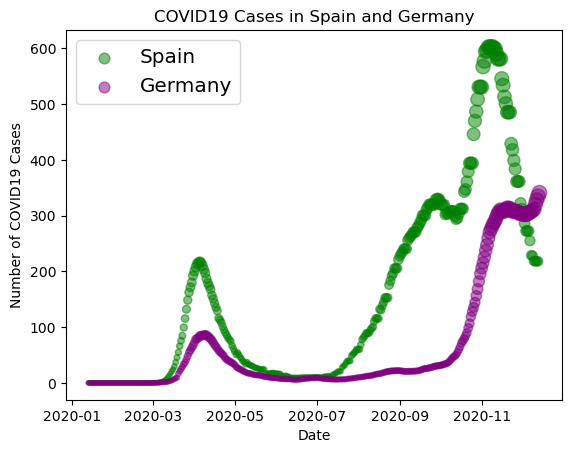

In [128]:
# SPAIN
ax0 = df_sp_ccases.plot(kind='scatter',
                    x='date',
                    y='cumulative_cases',
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_spain *100+10,  # pass in weights 
                    )

# GERMANY
ax1 = df_gr_ccases.plot(kind='scatter',
                    x='date',
                    y='cumulative_cases',
                    alpha=0.5,
                    color="purple",
                    s=norm_germany*100+10 ,
                    ax=ax0
                    )

ax0.set_ylabel('Number of COVID19 Cases')
ax0.set_xlabel('Date')
ax0.set_title('COVID19 Cases in Spain and Germany')
ax0.legend(['Spain', 'Germany'], loc='upper left', fontsize='x-large')

<br>

# Author

<a>Eva Villar Álvarez</a>


<br>

 **Change Log**

| Date (YYYY-MM-DD) | Version |      Change Description                                   | 
| ----------------- | ------- |---------------------------------------------------------- |
| 2023-12-31        | 1.0     | Add Matplotlib graphics pie, box, scatter, bubble plots   |
|                   |         | Group data by continent                                   |
| 2024-01-01        |         | Add function to select by groups                          |    